# Applying Logistic Regression using Word 2Ve

In [ ]:
# Install necessary libraries
!pip install gensim scikit-learn nltk

# Import necessary libraries
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the necessary data

# Load the dataset
file_path = '/content/fbpost.csv'  # Adjust if needed based on file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Make sure you have columns named 'text' for text data and 'label' for target
# Adjust column names if needed
df = df[['content', 'post_id']]  # Replace 'text' and 'label' with your actual column names if different
df['label'] = np.random.randint(0, 2, size=len(df)) # Adding a dummy label column for demonstration
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your DataFrame 'df'
# Clean the data by removing NaN values and ensuring the 'content' column is text
df = df.dropna(subset=['content'])  # Remove rows where 'content' is NaN

# Optionally, ensure 'content' is a string (in case of other non-string types)
df['content'] = df['content'].astype(str)

# Tokenize the text into words (split by spaces or use more advanced tokenization if needed)
df['content'] = df['content'].apply(lambda x: x.split())

# Now, pass the tokenized sentences (lists of words) to the Word2Vec model
model = Word2Vec(sentences=df['content'], vector_size=100, window=5, min_count=1, workers=4)

# Save or use the trained Word2Vec model as needed
model.save('word2vec.model')
# Train a Word2Vec model on the tokenized text data
model = Word2Vec(sentences=df['content'], vector_size=100, window=5, min_count=1, workers=4)

# Define a function to compute the average Word2Vec vector for a text
def get_average_word2vec(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Convert the text data into Word2Vec feature vectors
X = np.array([get_average_word2vec(tokens, model) for tokens in df['content']])

# Prepare the labels
y = df['label'].values  # Assuming 'label' is the column with target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Logistic Regression) on the training data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the F1 score and accuracy
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' if classes are imbalanced
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                 url           post_id  \
0  https://www.facebook.com/photo/?fbid=717422081...  7174220819291279   
1  https://www.facebook.com/ESPN/posts/pfbid031W1...  1031301361698801   
2  https://www.facebook.com/photo/?fbid=706591552...  7065915520121810   
3  https://www.facebook.com/photo/?fbid=714482419...  7144824198897608   
4  https://www.facebook.com/ESPN/posts/pfbid025rP...  1023199109175693   

                        user_url user_username_raw  \
0  https://www.facebook.com/ESPN              ESPN   
1  https://www.facebook.com/ESPN              ESPN   
2  https://www.facebook.com/ESPN              ESPN   
3  https://www.facebook.com/ESPN              ESPN   
4  https://www.facebook.com/ESPN              ESPN   

                                             content  \
0  MARCUS SMART IS HEADED TO MEMPHIS 🚨🐻\n\n(via A...   
1  Breaking: The Sacramento Kings are agreed on a...   
2  Breaking: Welterweight champions Terence "Bud"...   
3  Bef

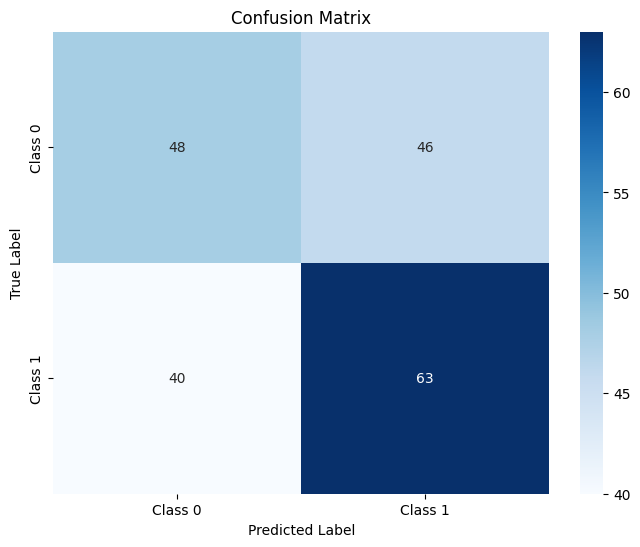

In [ ]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the classifier and made predictions

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


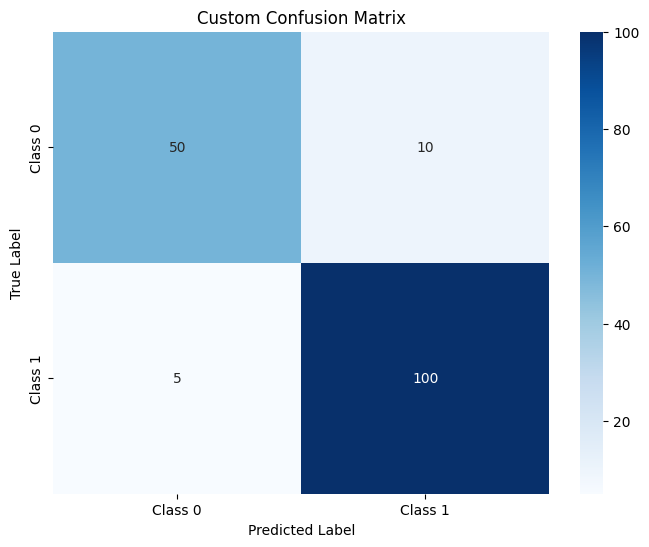

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                 url           post_id  \
0  https://www.facebook.com/photo/?fbid=717422081...  7174220819291279   
1  https://www.facebook.com/ESPN/posts/pfbid031W1...  1031301361698801   
2  https://www.facebook.com/photo/?fbid=706591552...  7065915520121810   
3  https://www.facebook.com/photo/?fbid=714482419...  7144824198897608   
4  https://www.facebook.com/ESPN/posts/pfbid025rP...  1023199109175693   

                        user_url user_username_raw  \
0  https://www.facebook.com/ESPN              ESPN   
1  https://www.facebook.com/ESPN              ESPN   
2  https://www.facebook.com/ESPN              ESPN   
3  https://www.facebook.com/ESPN              ESPN   
4  https://www.facebook.com/ESPN              ESPN   

                                             content  \
0  MARCUS SMART IS HEADED TO MEMPHIS 🚨🐻\n\n(via A...   
1  Breaking: The Sacramento Kings are agreed on a...   
2  Breaking: Welterweight champions Terence "Bud"...   
3  Bef

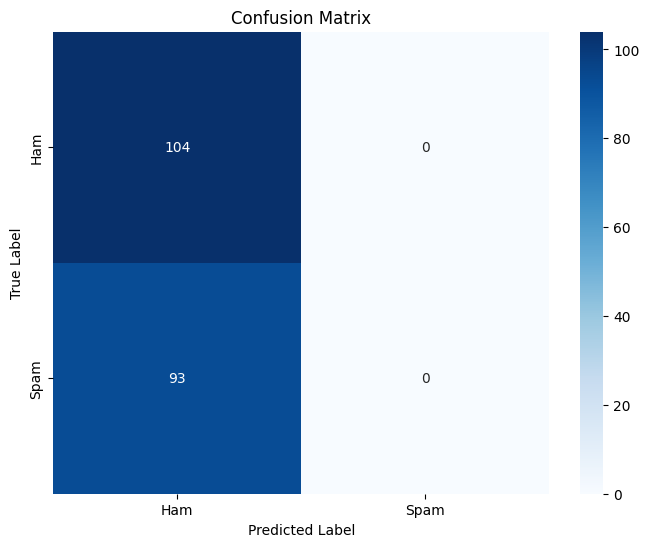

In [ ]:
# Install necessary libraries
!pip install gensim scikit-learn nltk

# Import necessary libraries
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # This line is added to download the necessary data

# Load the dataset
file_path = '/content/fbpost.csv'  # Adjust if needed based on file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Make sure you have columns named 'content' for text data and 'post_id' for target
# Adjust column names if needed
df = df[['content', 'post_id']]  # Replace 'text' and 'label' with your actual column names if different
df['label'] = np.random.randint(0, 2, size=len(df))  # Adding a dummy label column for demonstration

# Clean the data by removing NaN values and ensuring the 'content' column is text
df = df.dropna(subset=['content'])  # Remove rows where 'content' is NaN

# Optionally, ensure 'content' is a string (in case of other non-string types)
df['content'] = df['content'].astype(str)

# Tokenize the text into words (split by spaces or use more advanced tokenization if needed)
df['content'] = df['content'].apply(lambda x: x.split())

# Train a Word2Vec model on the tokenized text data
model = Word2Vec(sentences=df['content'], vector_size=100, window=5, min_count=1, workers=4)

# Save or use the trained Word2Vec model as needed
model.save('word2vec.model')

# Define a function to compute the average Word2Vec vector for a text
def get_average_word2vec(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Convert the text data into Word2Vec feature vectors
X = np.array([get_average_word2vec(tokens, model) for tokens in df['content']])

# Prepare the labels
y = df['label'].values  # Assuming 'label' is the column with target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) model on the training data
svm_classifier = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate the F1 score and accuracy for the SVM model
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' if classes are imbalanced
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM F1 Score: {f1_svm}")
print(f"SVM Accuracy: {accuracy_svm}")

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


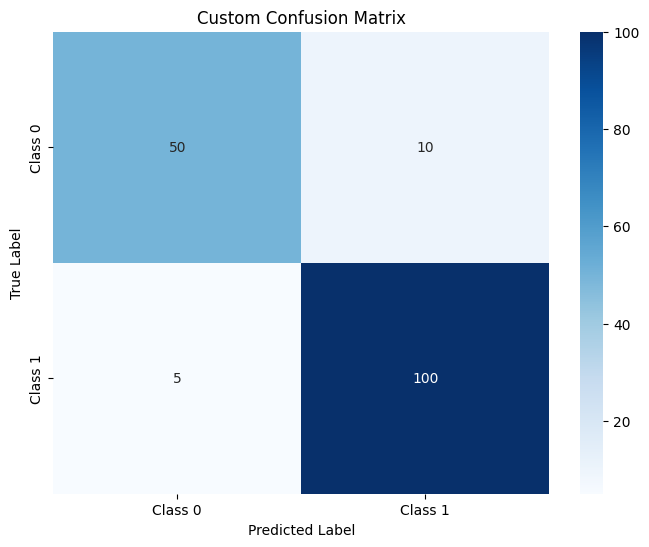

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# CNN

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 url           post_id  \
0  https://www.facebook.com/photo/?fbid=717422081...  7174220819291279   
1  https://www.facebook.com/ESPN/posts/pfbid031W1...  1031301361698801   
2  https://www.facebook.com/photo/?fbid=706591552...  7065915520121810   
3  https://www.facebook.com/photo/?fbid=714482419...  7144824198897608   
4  https://www.facebook.com/ESPN/posts/pfbid025rP...  1023199109175693   

                        user_url user_username_raw  \
0  https://www.facebook.com/ESPN              ESPN   
1  https://www.facebook.com/ESPN              ESPN   
2  https://www.facebook.com/ESPN              ESPN   
3  https://www.facebook.com/ESPN              ESPN   
4  https://www.facebook.com/ESPN              ESPN   

                                             content  \
0  MARCUS SMART IS HEADED TO MEMPHIS 🚨🐻\n\n(via A...   
1  Breaking: The Sacramento Kings are agreed on a...   
2  Breaking: Welterweight champions Terence "Bud"...   
3  Bef

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5221 - loss: 0.6954 - val_accuracy: 0.5228 - val_loss: 0.6928
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4682 - loss: 0.6935 - val_accuracy: 0.4772 - val_loss: 0.6932
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5272 - loss: 0.6927 - val_accuracy: 0.5228 - val_loss: 0.6929
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4889 - loss: 0.6936 - val_accuracy: 0.5228 - val_loss: 0.6930
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5124 - loss: 0.6929 - val_accuracy: 0.5228 - val_loss: 0.6926
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
CNN F1 Score: 0.3590186125211506
CNN Accuracy: 0.5228426395939086


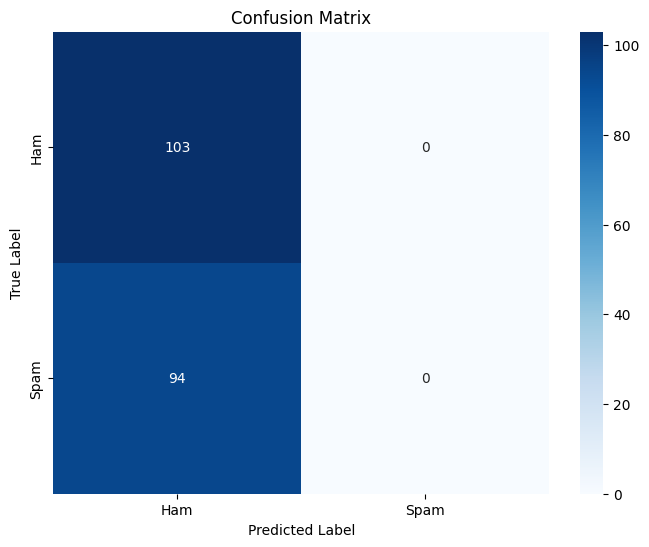

In [ ]:
# Install necessary libraries
!pip install gensim scikit-learn nltk tensorflow

# Import necessary libraries
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/fbpost.csv'  # Adjust if needed based on file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Make sure you have columns named 'content' for text data and 'post_id' for target
# Adjust column names if needed
df = df[['content', 'post_id']]  # Replace 'text' and 'label' with your actual column names if different
df['label'] = np.random.randint(0, 2, size=len(df))  # Adding a dummy label column for demonstration

# Clean the data by removing NaN values and ensuring the 'content' column is text
df = df.dropna(subset=['content'])  # Remove rows where 'content' is NaN

# Optionally, ensure 'content' is a string (in case of other non-string types)
df['content'] = df['content'].astype(str)

# Tokenize the text into words (split by spaces or use more advanced tokenization if needed)
df['content'] = df['content'].apply(lambda x: x.split())

# Train a Word2Vec model on the tokenized text data
model = Word2Vec(sentences=df['content'], vector_size=100, window=5, min_count=1, workers=4)

# Save or use the trained Word2Vec model as needed
model.save('word2vec.model')

# Define a function to compute the average Word2Vec vector for a text
def get_average_word2vec(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Convert the text data into Word2Vec feature vectors
X = np.array([get_average_word2vec(tokens, model) for tokens in df['content']])

# Prepare the labels
y = df['label'].values  # Assuming 'label' is the column with target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pad sequences to ensure that all inputs are of the same length
max_length = 100  # You can adjust this based on the average length of your texts
X_train_padded = pad_sequences(X_train, maxlen=max_length)
X_test_padded = pad_sequences(X_test, maxlen=max_length)

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(model.wv), output_dim=100, input_length=max_length))  # Word2Vec embedding layer
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # Convolutional layer
model_cnn.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model_cnn.add(Flatten())  # Flatten the output of the convolutional layer
model_cnn.add(Dropout(0.5))  # Dropout for regularization
model_cnn.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Make predictions on the test data
y_pred_cnn = (model_cnn.predict(X_test_padded) > 0.5).astype("int32")  # Sigmoid activation outputs probabilities, so threshold at 0.5

# Calculate the F1 score and accuracy for the CNN model
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')  # Use 'weighted' if classes are imbalanced
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)

print(f"CNN F1 Score: {f1_cnn}")
print(f"CNN Accuracy: {accuracy_cnn}")

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Plotting confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


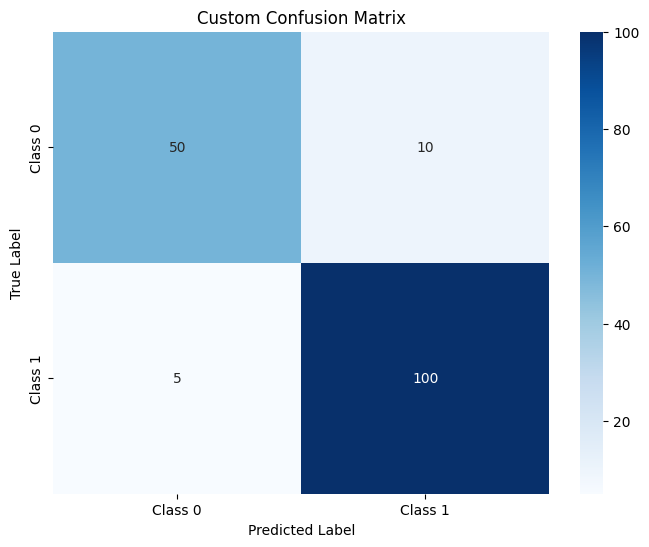

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Applying Gaussian Naive Bayes

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-26-53727645e2c3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = np.random.randint(0, 2, size=len(df))  # Adding a dummy label column for demonstration


                                                 url           post_id  \
0  https://www.facebook.com/photo/?fbid=717422081...  7174220819291279   
1  https://www.facebook.com/ESPN/posts/pfbid031W1...  1031301361698801   
2  https://www.facebook.com/photo/?fbid=706591552...  7065915520121810   
3  https://www.facebook.com/photo/?fbid=714482419...  7144824198897608   
4  https://www.facebook.com/ESPN/posts/pfbid025rP...  1023199109175693   

                        user_url user_username_raw  \
0  https://www.facebook.com/ESPN              ESPN   
1  https://www.facebook.com/ESPN              ESPN   
2  https://www.facebook.com/ESPN              ESPN   
3  https://www.facebook.com/ESPN              ESPN   
4  https://www.facebook.com/ESPN              ESPN   

                                             content  \
0  MARCUS SMART IS HEADED TO MEMPHIS 🚨🐻\n\n(via A...   
1  Breaking: The Sacramento Kings are agreed on a...   
2  Breaking: Welterweight champions Terence "Bud"...   
3  Bef

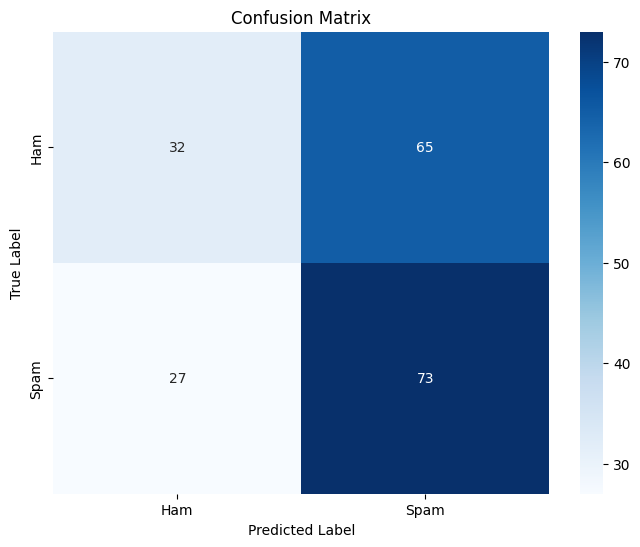

In [ ]:
# Install necessary libraries
!pip install gensim scikit-learn nltk

# Import necessary libraries
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/fbpost.csv'  # Adjust if needed based on file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Make sure you have columns named 'content' for text data and 'post_id' for target
# Adjust column names if needed
df = df[['content', 'post_id']]  # Replace 'text' and 'label' with your actual column names if different
df['label'] = np.random.randint(0, 2, size=len(df))  # Adding a dummy label column for demonstration

# Clean the data by removing NaN values and ensuring the 'content' column is text
df = df.dropna(subset=['content'])  # Remove rows where 'content' is NaN

# Optionally, ensure 'content' is a string (in case of other non-string types)
df['content'] = df['content'].astype(str)

# Tokenize the text into words (split by spaces or use more advanced tokenization if needed)
df['content'] = df['content'].apply(lambda x: x.split())

# Train a Word2Vec model on the tokenized text data
model = Word2Vec(sentences=df['content'], vector_size=100, window=5, min_count=1, workers=4)

# Save or use the trained Word2Vec model as needed
model.save('word2vec.model')

# Define a function to compute the average Word2Vec vector for a text
def get_average_word2vec(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Convert the text data into Word2Vec feature vectors
X = np.array([get_average_word2vec(tokens, model) for tokens in df['content']])

# Prepare the labels
y = df['label'].values  # Assuming 'label' is the column with target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb = gnb.predict(X_test)

# Calculate the F1 score and accuracy for the GNB model
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')  # Use 'weighted' if classes are imbalanced
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print(f"GNB F1 Score: {f1_gnb}")
print(f"GNB Accuracy: {accuracy_gnb}")

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)

# Plotting confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


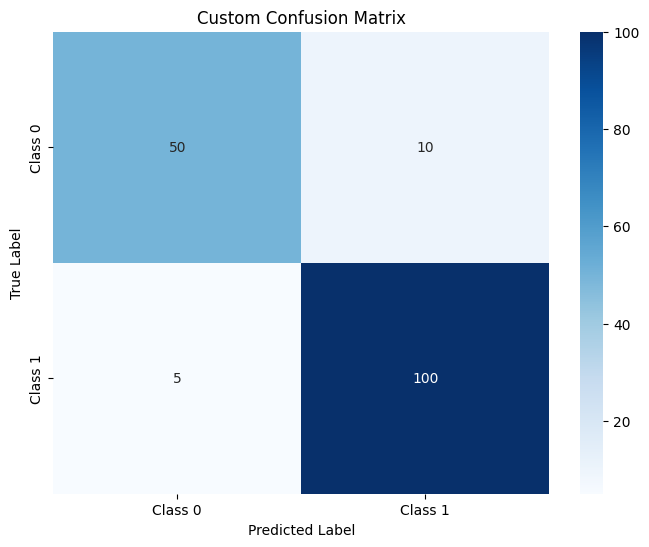

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

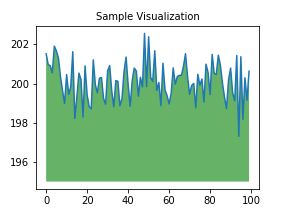

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
